In [18]:
import xml.etree.ElementTree as ET
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# XML TC track data path
data_path = '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/2024_TCG_VED_WRFsen/storage/tigge/'
data_file = data_path+'z_tigge_c_kwbc_20160703120000_GEFS_glob_prod_esttr_glo.xml'

# Parse XML track file
tree = ET.parse(data_file)
root = tree.getroot()

In [4]:
def save_tigge_gefs_tracks(root):
    # Initialize the list to store extracted data
    data = []
    
    # Loop through each 'data' entry with ensemble forecast data
    for data_entry in root.findall(".//data[@type='ensembleForecast']"):
        member = data_entry.get("member")  # Get the ensemble forecast member ID
        # Loop through each disturbance in the data entry
        for disturbance in data_entry.findall(".//disturbance"):
            cyclone_name = disturbance.find("cycloneName").text  # Get cyclone name
            basin = disturbance.find("basin").text  # Get basin
            
            # Loop through each 'fix' entry in the disturbance
            for fix in disturbance.findall("fix"):
                # Extract data as before
                hour = fix.get("hour")
                valid_time = fix.find("validTime").text
                latitude = fix.find("latitude").text
                longitude = fix.find("longitude").text
                sub_region = fix.find("subRegion").text
                pressure = fix.find("cycloneData/minimumPressure/pressure").text
                wind_speed = fix.find("cycloneData/maximumWind/speed").text
            
                # Append the data to the list, including cyclone name and basin
                data.append({
                    "Ensemble Member": member,
                    "Cyclone Name": cyclone_name,
                    "Basin": basin,
                    "Hour": hour,
                    "Valid Time": valid_time,
                    "Latitude (deg N)": latitude,
                    "Longitude (deg E)": longitude,
                    "Sub Region": sub_region,
                    "Pressure (hPa)": pressure,
                    "Wind Speed (kt)": wind_speed,
                })
    return pd.DataFrame(data)

# Data converted to pandas dataframes

In [5]:
df = save_tigge_gefs_tracks(root)

## What TCs are in the file?

In [7]:
print(df['Cyclone Name'].unique(), df['Basin'].unique())

['Agatha' 'Nepartak' 'Blas'] ['EP' 'WP']


## Read GEFS Forecasts for NEPARTAK

In [8]:
nepartak = df[df['Cyclone Name']=='Nepartak']

In [17]:
lat_memb1 = nepartak[nepartak['Ensemble Member']==str(1)]['Latitude (deg N)']
lon_memb1 = nepartak[nepartak['Ensemble Member']==str(1)]['Longitude (deg E)']

## Plot em'!

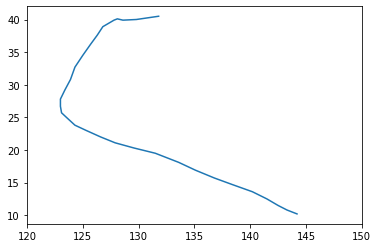

In [34]:
plt.plot([float(obj) for obj in lon_memb1.to_list()],
         [float(obj) for obj in lat_memb1.to_list()])
plt.xlim(120,150)
plt.show()

In [31]:
[float(obj) for obj in lon_memb1.to_list()]

[144.2,
 143.3,
 142.5,
 141.5,
 140.2,
 138.4,
 136.8,
 135.1,
 133.6,
 131.5,
 129.6,
 127.9,
 126.6,
 125.3,
 124.3,
 123.6,
 123.1,
 123.0,
 123.0,
 123.4,
 123.9,
 124.3,
 125.0,
 125.7,
 126.3,
 126.8,
 127.8,
 128.1,
 128.6,
 129.8,
 131.8]